# Credentials für die Bildanalyse

basierend auf [diesen](https://learn.microsoft.com/de-de/azure/cognitive-services/computer-vision/how-to/call-analyze-image?tabs=rest) Artikel hier.

In [19]:
api_key = "geheim"
api_endpunkt = "https://tubildanalyse.cognitiveservices.azure.com/vision/v3.2/analyze?visualFeatures=Categories,Objects,Description&details=Landmarks"
image_name = "dg.jpg"


# Einlesen des Bildes

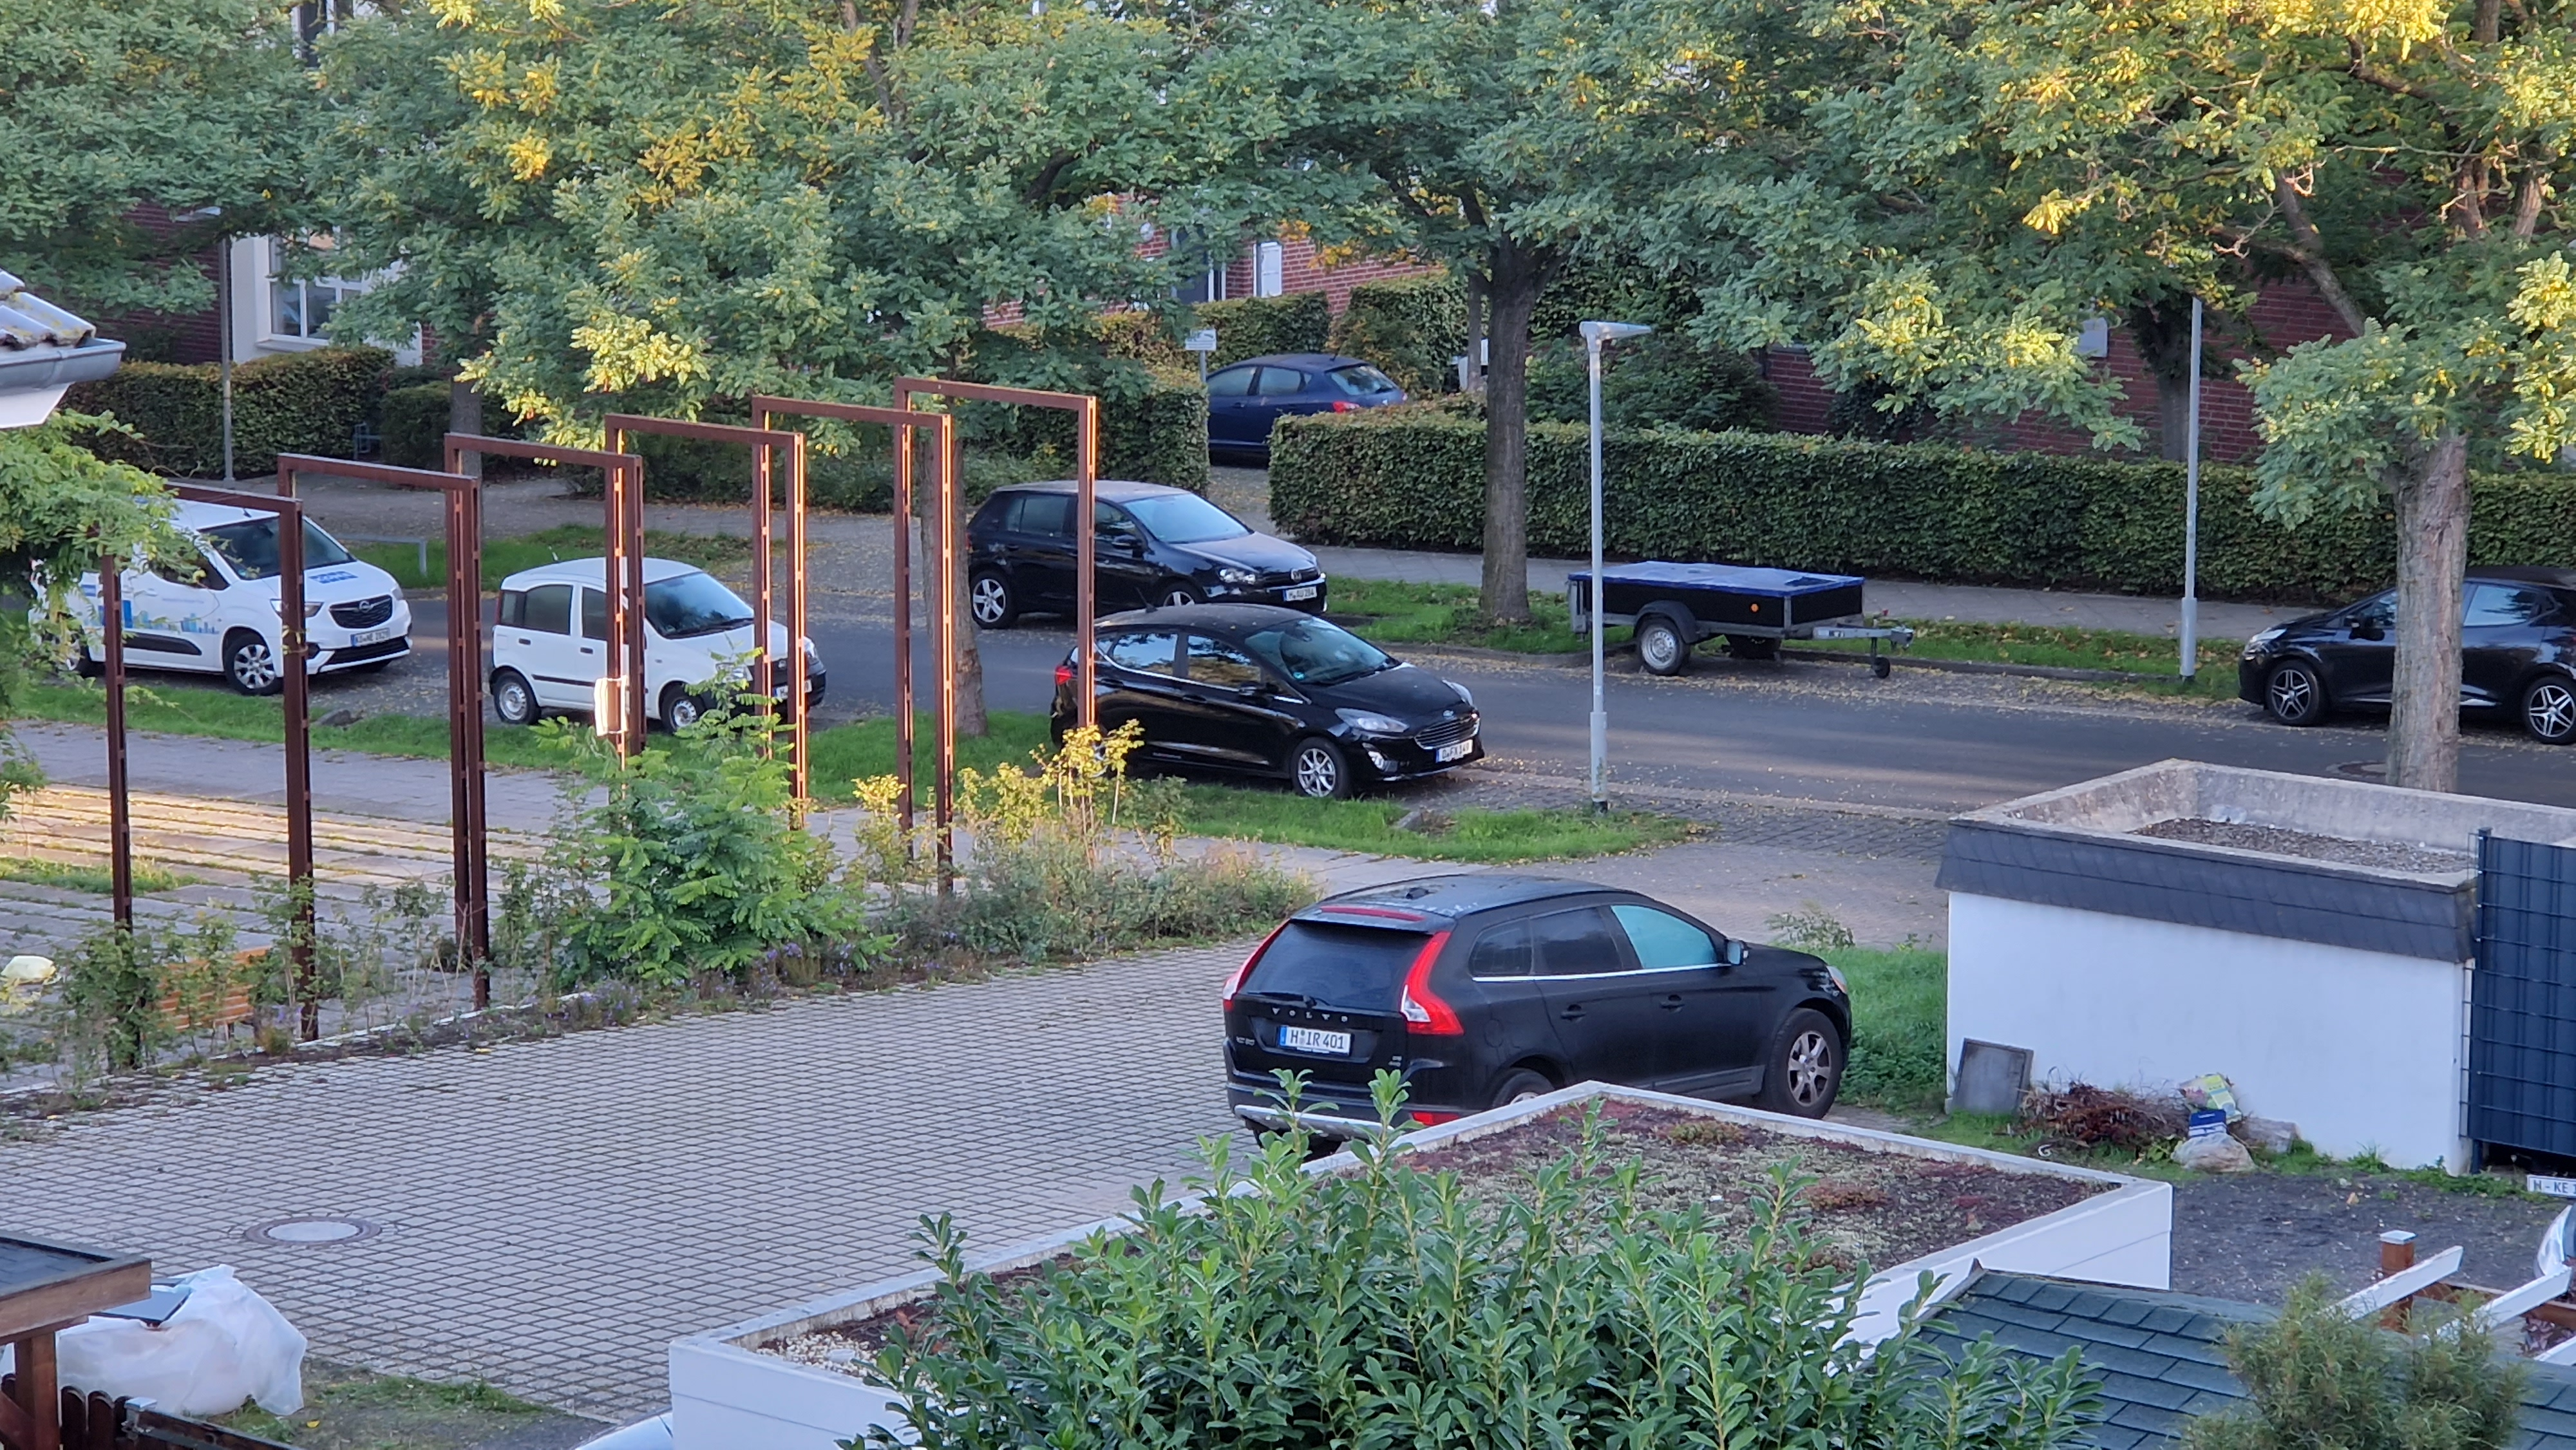

In [20]:
from IPython.display import Image

img=Image(filename=image_name)
img

## Aufrufen der API

In [21]:
import requests
import json

files = [('file', (image_name, open(image_name, 'rb'), 'image/jpeg'))]


headers = {
    'Ocp-Apim-Subscription-Key': api_key
}
r2 = requests.post(api_endpunkt, files=files, headers=headers)
mydata = json.loads(r2.text)
print(json.dumps(mydata, indent=4))

{
    "categories": [
        {
            "name": "outdoor_",
            "score": 0.0625,
            "detail": {
                "landmarks": []
            }
        }
    ],
    "description": {
        "tags": [
            "tree",
            "outdoor",
            "grass",
            "garden",
            "several",
            "curb"
        ],
        "captions": [
            {
                "text": "a group of cars parked in a parking lot",
                "confidence": 0.5601752996444702
            }
        ]
    },
    "objects": [
        {
            "rectangle": {
                "x": 1864,
                "y": 554,
                "w": 369,
                "h": 159
            },
            "object": "Van",
            "confidence": 0.51,
            "parent": {
                "object": "car",
                "confidence": 0.666,
                "parent": {
                    "object": "Land vehicle",
                    "confidence": 0.688,
                

## Auswerten des Bildes

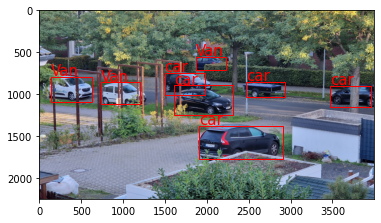

In [22]:
from turtle import color
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(image_name)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

for obj in mydata["objects"]:
    object_rect=obj["rectangle"]
    rect = patches.Rectangle((object_rect["x"], object_rect["y"]),
                             object_rect["w"],
                             object_rect["h"],
                             linewidth=1,
                             edgecolor='r',
                             facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.text(object_rect["x"],object_rect["y"]-20,obj["object"],size=15,color='red')



plt.show()